In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from cgan import cGAN

Loading model.

In [2]:
cgan16 = cGAN(device='cpu', latent_dim=16)
cgan64 = cGAN(device='cpu', latent_dim=64)
cgan128 = cGAN(device='cpu', latent_dim=128)

In [3]:
model16 = torch.load('best_models/cgan_ld16_ligcl_ausio2_epoch200.pth', map_location=torch.device('cpu'), weights_only=True)
model64 = torch.load('best_models/cgan_ld64_ligcl_ausio2_epoch200.pth', map_location=torch.device('cpu'), weights_only=True)
model128 = torch.load('best_models/cgan_ld128_ligcl_ausio2_epoch200.pth', map_location=torch.device('cpu'), weights_only=True)

cgan16.generator.load_state_dict(model16['generator'])
cgan16.discriminator.load_state_dict(model16['discriminator'])
cgan64.generator.load_state_dict(model64['generator'])
cgan64.discriminator.load_state_dict(model64['discriminator'])
cgan128.generator.load_state_dict(model128['generator'])
cgan128.discriminator.load_state_dict(model128['discriminator'])

<All keys matched successfully>

## Learning Curves

Plotting learning curves.

In [4]:
loss_g16 = np.load('best_models/loss_cgan_ld16_g_ligcl_ausio2.npy')
loss_d16 = np.load('best_models/loss_cgan_ld16_d_ligcl_ausio2.npy')
loss_g64 = np.load('best_models/loss_cgan_ld64_g_ligcl_ausio2.npy')
loss_d64 = np.load('best_models/loss_cgan_ld64_d_ligcl_ausio2.npy')
loss_g128 = np.load('best_models/loss_cgan_ld128_g_ligcl_ausio2.npy')
loss_d128 = np.load('best_models/loss_cgan_ld128_d_ligcl_ausio2.npy')

epochs16 = [i for i in range(loss_g16.shape[0])]
epochs64 = [i for i in range(loss_g64.shape[0])]
epochs128 = [i for i in range(loss_g128.shape[0])]

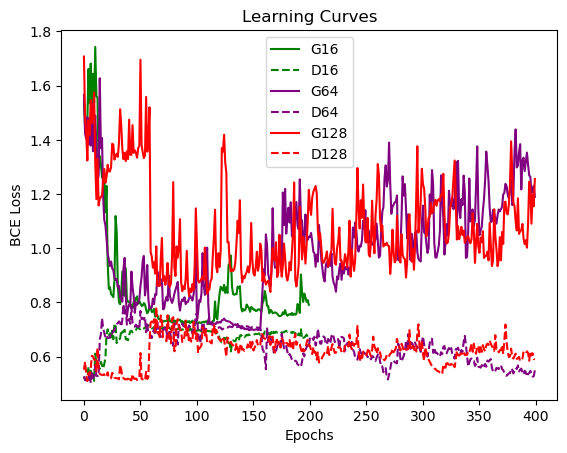

In [5]:
plt.plot(epochs16, loss_g16, label='G16', c='green')
plt.plot(epochs16, loss_d16, label='D16', c='green', linestyle='--')
plt.plot(epochs64, loss_g64, label='G64', c='purple')
plt.plot(epochs64, loss_d64, label='D64', c='purple', linestyle='--')
plt.plot(epochs128, loss_g128, label='G128', c='red')
plt.plot(epochs128, loss_d128, label='D128', c='red', linestyle='--')

plt.ylabel('BCE Loss')
plt.xlabel('Epochs')
plt.title('Learning Curves')
plt.legend()
plt.show()

In [6]:
fake16 = np.load('best_models/loss_cgan_ld16_d_fake_ligcl_ausio2.npy')
real16 = np.load('best_models/loss_cgan_ld16_d_real_ligcl_ausio2.npy')
fake64 = np.load('best_models/loss_cgan_ld64_d_fake_ligcl_ausio2.npy')
real64 = np.load('best_models/loss_cgan_ld64_d_real_ligcl_ausio2.npy')
fake128 = np.load('best_models/loss_cgan_ld128_d_fake_ligcl_ausio2.npy')
real128 = np.load('best_models/loss_cgan_ld128_d_real_ligcl_ausio2.npy')

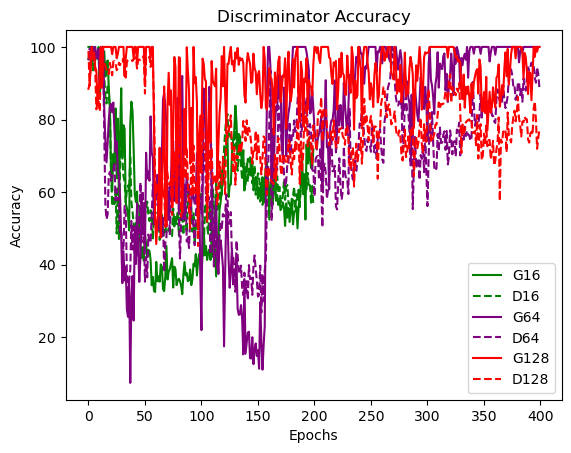

In [7]:
plt.plot(epochs16, fake16, label='G16', c='green')
plt.plot(epochs16, real16, label='D16', c='green', linestyle='--')
plt.plot(epochs64, fake64, label='G64', c='purple')
plt.plot(epochs64, real64, label='D64', c='purple', linestyle='--')
plt.plot(epochs128, fake128, label='G128', c='red')
plt.plot(epochs128, real128, label='D128', c='red', linestyle='--')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Discriminator Accuracy')
plt.legend()
plt.show()

## Model avaliation

Loading data.

In [8]:
data_ausio2 = np.load('../tipAu_SiO2_morl.npz')['wavelets']
data_ligcl = np.load('../tipLig_CL_morl.npz')['wavelets']

data_ausio2 = torch.tensor(data_ausio2, dtype=torch.float32).unsqueeze(1)
data_ausio2 /= data_ausio2.max()
data_ligcl = torch.tensor(data_ligcl, dtype=torch.float32).unsqueeze(1)
data_ligcl /= data_ligcl.max()

Testing.

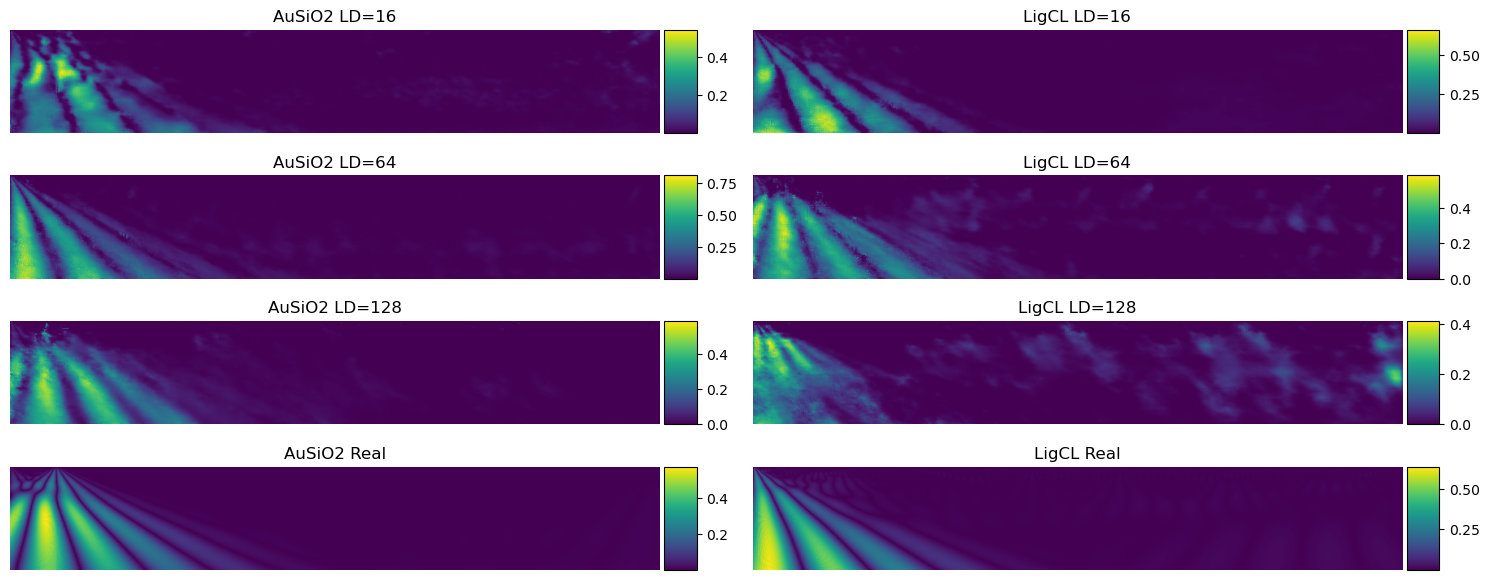

In [9]:
label_ligcl, label_ausio2 = torch.tensor([[1.0, 0.0]]), torch.tensor([[0.0, 1.0]])

sample16_ausio2 = torch.randn(1, 16)
sample16_ligcl = torch.randn(1, 16)
sample64_ausio2 = torch.randn(1, 64)
sample64_ligcl = torch.randn(1, 64)
sample128_ausio2 = torch.randn(1, 128)
sample128_ligcl = torch.randn(1, 128)

with torch.no_grad():
    gen16_ausio2 = cgan16.generator(sample16_ausio2, label_ausio2)
    gen16_ligcl = cgan16.generator(sample16_ligcl, label_ligcl)
    gen64_ausio2 = cgan64.generator(sample64_ausio2, label_ausio2)
    gen64_ligcl = cgan64.generator(sample64_ligcl, label_ligcl)
    gen128_ausio2 = cgan128.generator(sample128_ausio2, label_ausio2)
    gen128_ligcl = cgan128.generator(sample128_ligcl, label_ligcl)
    
fig, ax = plt.subplots(4, 2, figsize=(15, 6))

im0 = ax[0, 0].imshow(gen16_ausio2[0].squeeze())
ax[0, 0].axis('off')
ax[0, 0].set_title(f'AuSiO2 LD=16')
divider = make_axes_locatable(ax[0, 0])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im0, cax=cax)

im0 = ax[1, 0].imshow(gen64_ausio2[0].squeeze())
ax[1, 0].axis('off')
ax[1, 0].set_title(f'AuSiO2 LD=64')
divider = make_axes_locatable(ax[1, 0])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im0, cax=cax)

im0 = ax[2, 0].imshow(gen128_ausio2[0].squeeze())
ax[2, 0].axis('off')
ax[2, 0].set_title(f'AuSiO2 LD=128')
divider = make_axes_locatable(ax[2, 0])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im0, cax=cax)

im0 = ax[3, 0].imshow(data_ausio2[0].squeeze())
ax[3, 0].axis('off')
ax[3, 0].set_title(f'AuSiO2 Real')
divider = make_axes_locatable(ax[3, 0])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im0, cax=cax)

im0 = ax[0, 1].imshow(gen16_ligcl[0].squeeze())
ax[0, 1].axis('off')
ax[0, 1].set_title(f'LigCL LD=16')
divider = make_axes_locatable(ax[0, 1])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im0, cax=cax)

im0 = ax[1, 1].imshow(gen64_ligcl[0].squeeze())
ax[1, 1].axis('off')
ax[1, 1].set_title(f'LigCL LD=64')
divider = make_axes_locatable(ax[1, 1])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im0, cax=cax)

im0 = ax[2, 1].imshow(gen128_ligcl[0].squeeze())
ax[2, 1].axis('off')
ax[2, 1].set_title(f'LigCL LD=128')
divider = make_axes_locatable(ax[2, 1])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im0, cax=cax)

im0 = ax[3, 1].imshow(data_ligcl[0].squeeze())
ax[3, 1].axis('off')
ax[3, 1].set_title(f'LigCL Real')
divider = make_axes_locatable(ax[3, 1])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im0, cax=cax)

plt.tight_layout()
plt.show()